<img src="https://www.epfl.ch/about/overview/wp-content/uploads/2020/07/logo-epfl-1024x576.png" style="padding-right:10px;width:140px;float:left"></td>
<h2 style="white-space: nowrap">Image Processing Laboratory Notebooks</h2>
<hr style="clear:both">
<p style="font-size:0.85em; margin:2px; text-align:justify">
This Juypter notebook is part of a series of computer laboratories which are designed
to teach image-processing programming; they are running on the EPFL's Noto server. They are the practical complement of the theoretical lectures of the EPFL's Master course <b>Image Processing II</b> 
(<a href="https://moodle.epfl.ch/course/view.php?id=463">MICRO-512</a>) taught by Dr. D. Sage, Dr. M. Liebling, Prof. M. Unser and Prof. D. Van de Ville.
</p>
<p style="font-size:0.85em; margin:2px; text-align:justify">
The project is funded by the Center for Digital Education and the School of Engineering. It is owned by the <a href="http://bigwww.epfl.ch/">Biomedical Imaging Group</a>. 
The distribution or the reproduction of the notebook is strictly prohibited without the written consent of the authors.  &copy; EPFL 2022.
</p>
<p style="font-size:0.85em; margin:0px"><b>Authors</b>: 
    <a href="mailto:pol.delaguilapla@epfl.ch">Pol del Aguila Pla</a>, 
    <a href="mailto:kay.lachler@epfl.ch">Kay Lächler</a>,
    <a href="mailto:alejandro.nogueronaramburu@epfl.ch">Alejandro Noguerón Arámburu</a>,
    <a href="mailto:daniel.sage@epfl.ch">Daniel Sage</a>, and
    <a href="mailto:kamil.seghrouchni@epfl.ch">Kamil Seghrouchni</a>.
     
</p>
<hr style="clear:both">
<h1>Lab 5.2: Geometric transformation - Applications</h1>
<div style="background-color:#F0F0F0;padding:4px">
    <p style="margin:4px;"><b>Released</b>: Thursday 24th of March, 2022</p>
    <p style="margin:4px;"><b>Submission</b>: <span style="color:red">Friday 1st of April 2022</span> (before 11:59PM) on <a href="https://moodle.epfl.ch/course/view.php?id=463">Moodle</a></p>
    <p style="margin:4px;"><b>Grade weight</b> (Lab 5, 25 points): 7.5 % of the overall grade</p>
    <p style="margin:4px;"><b>Help sessions</b>: Monday 28th of March, 2022 on Zoom (12h-13h, see Moodle for link) and Thursday 31st of March on campus</p>
    <p style="margin:4px;"><b>Related lectures</b>: Chapter 7</p>
</div>

### Student Name: Guanqun LIU
### SCIPER: 334988

Double-click on this cell and fill your name and SCIPER number. Then, run the cell below to verify your identity in Noto and set the seed for random results.

In [3]:
import getpass
# This line recovers your camipro number to mark the images with your ID
uid = int(getpass.getuser().split('-')[2]) if len(getpass.getuser().split('-')) > 2 else ord(getpass.getuser()[0])
print(f'SCIPER: {uid}')

SCIPER: 334988


## <a name="imports_"></a> Imports
In the next cell we import standard Python libraries that we will use throughout the lab, as well as the following libraries that are required for the exercises:

* [`matplotlib.pyplot`](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.html), to display images,
* [`ipywidgets`](https://ipywidgets.readthedocs.io/en/latest/), to make the image display interactive,
* [`numpy`](https://numpy.org/doc/stable/reference/index.html), for mathematical operations on arrays,
* [`openCV` (cv2)](https://docs.opencv.org/2.4/index.html), for image processing tasks,
* [`scipy`(scipy)](https://www.scipy.org), also for image processing tasks.

We will then load the `ImageViewer()` class as `viewer`. You can find the documentation of the class [here](https://github.com/Biomedical-Imaging-Group/interactive-kit/wiki/Image-Viewer).

Finally, we load the images you will use in the exercise to test your functions. 

In [27]:
# Configure plotting as dynamic
%matplotlib widget

# Import standard required packages
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import ipywidgets as widgets
from scipy import ndimage
from interactive_kit import imviewer as viewer

# Load images to be used in this lab
sicilia_map = cv.imread('images/sicilia_map.png',cv.IMREAD_UNCHANGED).astype(np.float64)
sicilia_photo = cv.imread('images/sicilia_photo.png',cv.IMREAD_UNCHANGED).astype(np.float64)
EPFL_map = cv.imread('images/EPFL_map.png',cv.IMREAD_UNCHANGED).astype(np.float64)
EPFL_photo= cv.imread('images/EPFL_photo.png',cv.IMREAD_UNCHANGED).astype(np.float64)
eiffel  = cv.imread('images/eiffel.png',cv.IMREAD_UNCHANGED).astype(np.float64)
alsace = cv.imread('images/alsace.png',cv.IMREAD_UNCHANGED).astype(np.float64)

# Geometric transformation applications  (10 points)

In this part of the laboratory we will first compare the various interpolators you have studied in Part 1 in more detail, and then we will use geometric transformations for several applications. You will learn about *image registration*, *image distortion*, and how to use Python for other image processing applications. We will only cover two-dimensional graylevel geometric transformations, but keep in mind that the same operations can easily be adapted to color images by treating each color channel as an independent graylevel image.

<div class = 'alert alert-info'>

<b>Note:</b> This part of the lab will be carried out completely in Python. Before starting, you should have completed the <a href='./1_GT_Implementations.ipynb'>first part</a> of this lab and understood how to use <a href='https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#gafbbc470ce83812914a70abfb604f4326'><code>cv.getRotationMatrix2D</code></a> and <a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.affine_transform.html#scipy-ndimage-affine-transform'><code>ndimage.affine_transform</code></a> to perform geometric transformations in Python.
</div>

## <a id="ToC_2_GT_Applications"></a>Table of contents
1. [Comparison of interpolators](#1.-Comparison-of-interpolators-(4-points)) **(4 points)** 
2. [Image registration](#2.-Image-registration)
    1. [Implementation](#2.A.-Implementation-(3-points)) **(3 points)** 
    2. [Experimentation](#2.B.-Experimentation)
3. [Image distortion](#3.-Image-distortion)
    1. [Implementation](#3.A.-Implementation-(3-points)) **(3 points)**
    2. [Experimentation](#3.B.-Experimentation)

### Visualize images
Use the next cell to get familiar with the images you are going to be using. Remember that you can use `Next` / `Prev` to cycle through the images.

In [28]:
# Display images
image_list = [sicilia_map , sicilia_photo, EPFL_map, EPFL_photo, eiffel, alsace]

plt.close('all')
imgs_viewer = viewer(image_list, widgets=True)

# 1. Comparison of interpolators (4 points)
[Back to table of contents](#ToC_2_GT_Applications)

In the last cell of Part 1 you already got a glimpse of what difference a good interpolator can make on an image transformation. In this part, we will use Python to perform a numerical comparison of the three interpolators we studied there. To make the rest of the code simpler and easier to read, we will first redefine the transform function in Python. 

In the next cell, **for 2 points**, implement the function `transform(img, angle, scaling, center, order)` that takes as input parameters

* `img`: the original image,
* `angle`: the angle of rotation in degrees,
* `scaling`: the scaling factor,
* `center`: the center of rotation following NumPy indexing protocols, i.e., ($c_2$, $c_1$),
* `order`: the order of interpolation to use (`0` = nearest neighbor, `1` = linear, and `3` = cubic),

and returns

* `out`: the transformed image.

<div class='alert alert-danger'>

<b>Important:</b> Only use the two functions <code>cv.getRotationMatrix2D(center, angle, scale)</code> and <code>ndimage.affine_transform(img, matrix, order)</code>. If you don't remember how to do it, look at <a href='./1_GT_Implementations.ipynb/#1.D.-Geometric-transformations-in-Python-(1-point)'>Section 1.D</a> of the first notebook.
</div>

In [29]:
def transform(img, angle, scaling, center, order):
    out = np.zeros(img.shape)
    
    # YOUR CODE HERE
    M = cv.getRotationMatrix2D(center, angle, 1/scaling)
    out = ndimage.affine_transform(img, M, order=order)
    
    return out

Run the next cell for a quick sanity check. In it, we also define the function `SNR` that calculates the signal-to-noise ratio between two images, which we will use for the upcoming analysis.

<div class = 'alert alert-danger'>

<b>Note:</b> Remember that this is <b>NOT</b> a definitive test, and the fact that the cell runs does not guarantee that you will get the points. 
</div>    

In [30]:
# Define test image
test_img = np.zeros((7,7)); test_img[1:6, 1:6] = 255; test_img[2:5, 2:5] = 0
correct = []
correct.append(np.array([[  0.,   0.,   0.,   0., 255., 255., 255.], [  0.,   0.,   0., 255.,   0.,   0., 255.],
                         [  0.,   0., 255., 255.,   0.,   0.,   0.], [  0.,   0.,   0., 255., 255.,   0., 255.],
                         [  0.,   0.,   0.,   0., 255., 255., 255.], [  0.,   0.,   0.,   0.,   0., 255.,   0.],
                         [  0.,   0.,   0.,   0.,   0.,   0.,   0.]]))
correct.append(np.array([[  0.,   0.,   0.,   0., 200., 193., 164.], [  0.,   0.,   0., 200., 109.,   0., 146.],
                         [  0.,   0., 129., 193.,   0.,   0.,   0.], [  0.,   0.,   0., 164., 146.,   0., 182.],
                         [  0.,   0.,   0.,   0., 164., 224., 128.], [  0.,   0.,   0.,   0.,   0.,  82.,   0.],
                         [  0.,   0.,   0.,   0.,   0.,   0.,   0.]]))
correct.append(np.array([[  0.,   0.,   0.,  -0., 215., 259., 171.], [  0.,   0.,  -0., 215., 134., -59., 181.],
                         [  0.,   0., 115., 259., -59.,  -4., -40.], [  0.,   0.,   0., 171., 181., -40., 224.],
                         [  0.,   0.,   0.,   0., 172., 299., 120.], [  0.,   0.,   0.,   0.,   0.,  59.,   0.],
                         [  0.,   0.,   0.,   0.,   0.,   0.,   0.]]))
# Check the results
orders = [0, 1, 3]
names_interp = {0:'Nearest neighbors',1:'Linear', 3:'Cubic'}
transformed = [np.round(transform(test_img, 45, 0.9, (0, 3), i)) for i in orders]
names = [f'Transformed, {names_interp[i]}' for i in orders]
plt.close('all')
img_list = []; title_list = []; err_count = 0
for i, o in enumerate(orders):
    if not np.allclose(correct[i], transformed[i]):
        print(f'WARNING!\nCalling transform with {names_interp[o]} interpolation did not produce the correct result. Check the images below:')
        img_list.append(transformed[i]); img_list.append(correct[i]); img_list.append(transformed[i] - correct[i])
        title_list.append(names[i]); title_list.append(names[i] + ' (correct)'); title_list.append('Difference')
        err_count += 1
if err_count > 0:
    view = viewer(test_img, title=['Test image'], subplots=(1,1))
    view_err = viewer(img_list, title=title_list, subplots=(err_count,3))
else:
    view = viewer([test_img] + transformed, title=['Test image'] + names, subplots=(2,2))
    print('Nice! Your transform function passed the sanity check.')

Button(description='Show Widgets', style=ButtonStyle())

Nice! Your transform function passed the sanity check.


Now that we have the `transform` function ready, we can start the comparison process. In order to clearly see differences, we want to apply multiple transformations consecutively on the same image using the same interpolation. Specifically, we want to create a function that rotates an image a total of $n$ times around its center by an angle $\alpha$. For example if $n=5$ and $\alpha=10$, the image should be roted $5$ times by $10^{\circ}$ around its center, and not just one time by $50^{\circ}$. Set the scaling parameter $\rho = 1$.

In the next cell, for **2 points**, implement the function `rotate_n` that takes as input parameters

* `img`: the input image,
* `alpha`: the angle of each rotation in degrees,
* `n`: the number of times the image should be rotated by `alpha`,
* `order`: the order of interpolation, as above,

and returns:

* `out`: the rotated image.

<div class='alert alert-info'>

<b>Hints:</b> <ul>
<li>Make use of the function <code>transform()</code> that you implemented above.</li>
<li>Be careful when selecting the center point of an image. Calculating the index of the center point of an array <code>a</code> of length $2n + 1$ might not be as simple as calling <code>len(a)/2</code>. To convince yourself, you can run a simple example using a short one-dimensional array. </li></ul>
</div>

In [31]:
# Function that rotates an image n times by angle alpha
def rotate_n(img, alpha, n, order):
    out = np.zeros(img.shape)
    
    # YOUR CODE HERE
    temp = img.copy()
    for r_idx in range(n):
        temp = transform(temp, alpha, 1, (np.floor(temp.shape[1] / 2), np.floor(temp.shape[0] / 2)), order)
    
    out = temp
    
    return out

Run the next cell to perform a quick sanity check.

In [32]:
# Define test image
test_img = np.zeros((7,7)); test_img[test_img.shape[0]//2, :] = 255
# Correct results
correct = []
correct.append(np.array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.], [  0.,   0.,   0., 255.,   0.,   0.,   0.],
                         [  0.,   0.,   0.,   0.,   0.,   0.,   0.], [  0.,   0., 255., 255.,   0.,   0.,   0.],
                         [  0.,   0., 255.,   0.,   0.,   0.,   0.], [  0.,   0.,   0., 255.,   0.,   0.,   0.],
                         [  0.,   0.,   0.,   0.,   0.,   0.,   0.]]))
correct.append(np.array([[  0.,   0.,   0.,  56.,  25.,   0.,   0.], [  0.,   6.,  51., 161.,  26.,   0.,   0.],
                         [  0.,   1.,  58., 121.,  57.,   0.,   0.], [  0.,   4.,  63., 255.,  63.,   4.,   0.],
                         [  0.,   0.,  57., 121.,  58.,   1.,   0.], [  0.,   0.,  26., 161.,  51.,   6.,   0.],
                         [  0.,   0.,  25.,  56.,   0.,   0.,   0.]]))
correct.append(np.array([[  0.,   0.,   0.,  66., -13.,   0.,   0.], [  0.,  -8.,  31., 268.,   2.,  -7.,   0.],
                         [  2., -14.,  13., 200.,  32.,  -8.,   0.], [  3., -15.,  28., 255.,  28., -15.,   3.],
                         [  0.,  -8.,  32., 200.,  13., -14.,   2.], [  0.,  -7.,   2., 268.,  31.,  -8.,   0.],
                         [  0.,   0., -13.,  66.,   0.,   0.,   0.]]))
orders = [0, 1, 3]
# Rotate 3 times by 30 degrees
rotated = [np.round(rotate_n(test_img, alpha=30, n=3, order=o)) for o in orders]
# Check if correct
names_interp = {0:'Nearest neighbors', 1:'Linear', 3:'Cubic'}
names = [f'Rotated 3x30, {names_interp[i]}' for i in orders]
plt.close('all')
img_list = []; title_list = []; err_count = 0
for i, o in enumerate(orders):
    if not np.allclose(correct[i], rotated[i]):
        print(f'WARNING!\nCalling rotate_n with {names_interp[o]} interpolation did not produce the correct result. Check the images below:')
        img_list.append(rotated[i]); img_list.append(correct[i]); img_list.append(rotated[i] - correct[i])
        title_list.append(names[i]); title_list.append(names[i] + ' (correct)'); title_list.append('Difference')
        err_count += 1
if err_count > 0:
    view = viewer(test_img, title=['Test image'], subplots=(1,1))
    view_err = viewer(img_list, title=title_list, subplots=(err_count,3))
else:
    view = viewer([test_img] + rotated, title=['Test image'] + names, subplots=(2,2))
    print('Nice! Your rotate_n function passed the sanity check.')

Button(description='Show Widgets', style=ButtonStyle())

Nice! Your rotate_n function passed the sanity check.


In the cell below, we provide you with a viewer where you can play around with the `rotate_n` function to get a feeling for why a good interpolation is so important.
<div class = 'alert alert-success'>
    
<b>Note</b>: If you want to see some cool artifacts from nearest neighbor interpolation, try very small angles of rotation. This will also show the improvement from the other interpolators. An example to start trying: $\alpha=1.5^{\circ}$, $n=10$.
</div>

In [33]:
# Define the sliders and button
alpha_slider = widgets.FloatSlider(value=0, min=-90, max=90, step=0.5, description='α')
n_slider = widgets.IntSlider(value=5, min=1, max=10, description='n')
order_dropdown = widgets.Dropdown(options=['0: Nearest neighbor', '1: Linear', '3: Cubic'], value='1: Linear', description='order:', disabled=False)
order_dictionary = {'0: Nearest neighbor':0, '1: Linear':1, '3: Cubic':3}
button = widgets.Button(description='Apply rotations')

# Rotate and scale callback function 
def rotate_n_callback(img):
    # retreive slider values for angle, scale and center
    alpha = alpha_slider.value
    n = n_slider.value
    order = order_dictionary[order_dropdown.value]
    # Perform n rotations by alpha
    return rotate_n(img, alpha, n, order)

# Visualize angle and scale effect during transformation
plt.close("all")
view = viewer([alsace], title = 'Alsace', new_widgets = [order_dropdown, alpha_slider, n_slider, button], 
              callbacks = [rotate_n_callback], widgets = True)

In case you still haven't been convinced by the cubic interpolation, let us now plot the signal to noise ratio of the three interpolators when rotating an image $n$ times by $35^{\circ}$ and then $n$ times by $-35^{\circ}$. Run the next cell to do so.

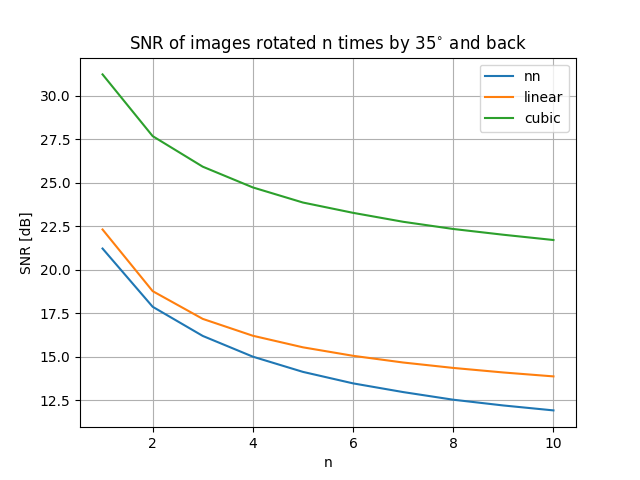

In [37]:
# Function that computes the signal to noise ratio between two images
def SNR(img, img_ref):
    return 10*np.log10(np.sum(img.astype(np.float64)**2)/np.sum((img_ref.astype(np.float64)-img.astype(np.float64))**2))
# Rotate images up to 10 times by 35 degrees and back
alpha = 35
ns = np.arange(1, 11, dtype=int)
snr_nn  = [SNR(rotate_n(rotate_n(alsace, alpha, n, 0), -alpha, n, 0), alsace) for n in ns]
snr_lin = [SNR(rotate_n(rotate_n(alsace, alpha, n, 1), -alpha, n, 1), alsace) for n in ns]
snr_cub = [SNR(rotate_n(rotate_n(alsace, alpha, n, 3), -alpha, n, 3), alsace) for n in ns]
# Display graphs
plt.close('all'); plt.figure()
plt.plot(ns, snr_nn,  label='nn')
plt.plot(ns, snr_lin, label='linear')
plt.plot(ns, snr_cub, label='cubic')
plt.legend(); plt.title('SNR of images rotated n times by $35^{\circ}$ and back')
plt.grid()
plt.ylabel('SNR [dB]'); plt.xlabel('n'); plt.show()

# 2. Image registration
[Back to table of contents](#ToC_2_GT_Applications)

In this section you will use your newly gained knowledge in image transformation to align two images in terms of rotation and zoom. In our example, we will use a map and a satellite image of Sicily. Since these two images are not aligned, one of the two images should be transformed to match the other one using the `transform()` function defined in the first part. Let's define the satellite image as the **original** image and the map image as the **target** image, so we want to align the satellite to the map image.

<table><tr>
<td>
  <p align="center" style="padding: 10px">
    <img alt="Routing" src="images/sicilia_photo.png" width="220"><br>
    <em style="color: grey">Satellite image of Sicily</em>
  </p> 
</td>
<td> 
  <p align="center">
    <img src="images/sicilia_map.png" alt="Drawing" style="width: 220px;"/><br>
    <em style="color: grey">Map of Sicily</em>
  </p> 
</td>
</tr></table>


## 2.A. Implementation (3 points)
[Back to table of contents](#ToC_2_GT_Applications)

In order to correctly transform the original image, we need to know the angle, the scaling and the center point of the transformation. To determine these parameters, we first need to identify at least two features that are present in each image. In our case, for example, the island of Malta and the city of Messina are good candidates. Having identified those two features in both images, we can calculate the vector going from the first to the second feature in both images. Let's denote this vector in the original image by $\mathbf{u}=[u_x, u_y]^T$ and the one in the target image by $\mathbf{v}=[v_x, v_y]^T$. From these two vectors, we can then calculate the angle and the scale of the transformation needed to match them.

The center point can be calculated by re-arranging the transformation equation

$$
(\mathbf{v}-\mathbf{c}) = \mathbf{A}(\mathbf{u} - \mathbf{c}) \mbox{ to obtain }
\mathbf{c} = (\mathbf{A} - \mathbf{I})^{-1}(\mathbf{A}\mathbf{u} - \mathbf{v} )\,,
$$

where $\mathbf{A}$ is the rotation matrix.

Remember that in the `transform()` function, we used `cv.getRotationMatrix2D(center, angle, scale)` with `center=(cy, cx)` and `scale=1/scaling` to obtain the **inverse** transformation matrix of size $2 \times 3$, with the last column being the translational component. Similarly you can obtain the simple $2 \times 2$ rotation matrix $\mathbf{A}$ by **only keeping the first two columns** of the result of this same function, when called with `center=(0, 0)` and `scale=scaling` (remember that in *NumPy*, you can use `array = array[:, :-1]` to drop the last column of an array). 

For **3 points**, complete the `register()` function below, which performs the image registration explained above when given two vectors $\mathbf{u}$ and $\mathbf{v}$.  The function takes as input parameters

 * `img`: the original image, 
 * `u1`: a $1 \times 2$ NumPy array containing the (x,y) coordinates of the first point in the original image, 
 * `u2`: a $1 \times 2$ NumPy array containing the (x,y) coordinates of the second point in the original image,
 * `v1`: a $1 \times 2$ NumPy array containing the (x,y) coordinates of the first point in the target image, 
 * `v2`: a $1 \times 2$ NumPy array containing the (x,y) coordinates of the second point in the target image,
 
and outputs

 * `out`: the registered image.

You will have to compute the `scaling`, `angle`, and `center` of rotation, to be used as parameters for the function `transform()`. When calling `transform()`, make sure to use cubic interpolation.
<div class="alert alert-info">
    
<b>Hint:</b> You might want to use the following functions: <a href='https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html'><code>np.linalg.norm</code></a>, <a href='https://numpy.org/doc/stable/reference/generated/numpy.arctan2.html'><code>np.arctan2</code></a>, <a href='https://numpy.org/doc/stable/reference/generated/numpy.dot.html'><code>np.dot</code></a>, <a href='https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html'><code>np.linalg.inv</code></a> and <a href='https://numpy.org/doc/stable/reference/generated/numpy.identity.html'><code>np.identity</code></a>. Check their documentation (click on their names here) if you are not familiar with them.
</div>

In [38]:
def register(img, u1, v1, u2, v2):
    # You will have to recompute these parameters
    angle = 0
    scaling = 1
    center = [0,0]
    #    center = np.linalg.inv(A - np.identity(2)) @ (np.dot(A, u) - v)

    
    # Compute vectors from points
    # Vector in the original image
    u = u2 - u1
    # Vector in the target image
    v = v2 - v1
    
    # Compute angle, scaling and center
    # YOUR CODE HERE
    scaling = np.linalg.norm(v) / np.linalg.norm(u)
    angle = (np.arctan2(u[1], u[0]) - np.arctan2(v[1], v[0])) * 180 / np.pi

    A = cv.getRotationMatrix2D((0, 0), angle, scaling)[:, :-1]
    center = np.dot(np.linalg.inv(A - np.identity(2)), (np.dot(A, u1) - v1))
    print(center)
    
    # Call the transform function with the calculated paremeters
    return transform(img, angle=angle, scaling=scaling, center=(center[1], center[0]), order=3)

Run the cell below for a quick sanity check. The two reference points in the test image are the leftmost and rightmost points of the long line.

In [39]:
# Define test image target
test_img_target = np.zeros((101,101)) 
test_img_target[50, 10:90] = 1
test_img_target[20:50, 50] = 1
# Transform target to create original
test_img_original = transform(test_img_target, angle=-60, scaling=0.6, center=(70, 30), order=3)
# Define points
u1, u2 = np.array((35, 54)), np.array((58, 94))
v1, v2 = np.array((10, 50)), np.array((90, 50))
# Register image
test_img_registered = register(test_img_original, u1, v1, u2, v2)
# Generate correctly registered image by back-transforming the original image (with the parameters from the ref vectors)
test_img_reg_corr = transform(test_img_original, angle=60.1011, scaling=1.7338, center=(70.2598, 30.8703), order=3)
if np.allclose(test_img_registered, test_img_reg_corr, atol=1e-3):
    print('Congrats! Your register function seems correct!')
else:
    print('WARNING!\nThe registration function is not yet correct. Look at the images below to see the differences.')
plt.close('all')
view = viewer([test_img_original, test_img_target, test_img_registered, test_img_reg_corr],
              title=['Original test image', 'Target test image', 'Your registered image', 'Correctly registered image'], 
              subplots=(2,2))

[30.87028253 70.25984739]
Congrats! Your register function seems correct!


Button(description='Show Widgets', style=ButtonStyle())

## 2.B. Experimentation
[Back to table of contents](#ToC_2_GT_Applications)

In this section, we are going to make direct use of your previous implementations to map the `sicilia_map` and `EPFL_map` images to `sicilia_photo` and `EPFL_photo`, respectively. For this purpose, we provide you with a viewer that allows you to select the mapping points and perform the transformations. Make sure that the reference points you select in the original image correspond to the same reference points in the target image.

<div class="alert alert-success">
    
<b>Note:</b> The vectors $\mathbf{u}=(u_1, u_2)^T$ and $\mathbf{v}=(v_1, v_2)^T$ are specified using the viewer with <code>clickable=True</code>. Two images will displayed side by side, and you will have to click with your mouse to

<ol><li>select $u_1$ on the first image,</li>
<li>select $v_1$ on the second image,</li>
<li>select $u_2$ on the first image,</li>
<li>select $v_2$ on the second image</li></ol>

in that order. In case you get it wrong and want to start again, you can 1) finish the selection and click again on the first image to start again, 2) click on the button *Reset* (loosing any zoom and pan you may have done), or 3) run the cell again to get a fresh new viewer. 

Marks will appear at the clicked point location on the selected image as well as the following display in the statistics panne<code>['click:i,x=***, y=***']</code>. Once the four points are selected, go to the menu <code>Extra Widgets</code> and use the button <code>Register Image</code> to perform the registration.

</div>

In [40]:
button = widgets.Button(description = 'Register Image')

def save_points(img, coords): 
    if len(coords) == 4: 
        u1 = np.array([coords[0]['x'],coords[0]['y']])
        v1 = np.array([coords[1]['x'],coords[1]['y']])
        u2 = np.array([coords[2]['x'],coords[2]['y']])
        v2 = np.array([coords[3]['x'],coords[3]['y']])
        #print(u1, v1, u2, v2)
        return register(img, u1, v1, u2, v2)
    else: 
        print('Select ', 4 - len(coords), 'points more.')
        return img

plt.close('all')
sicily_view = viewer([sicilia_photo, sicilia_map], title=['Sicilia map','Sicilia photo'], new_widgets=[button],
                     callbacks=[save_points], widgets=True, subplots=(1,2), clickable=True)

Now let's try it with the EPFL campus images. This time we align the map to the satellite image.

In [41]:
plt.close('all')
epfl_viewer = viewer([EPFL_map, EPFL_photo], title=['EPFL map', 'EPFL photo'], new_widgets=[button],
                     callbacks=[save_points], widgets=True, subplots=(1,2), clickable=True)

# 3. Image distortion
[Back to table of contents](#ToC_2_GT_Applications)

<table><tr>
<td> 
  <p align="center" style="padding: 10px">
    <img alt="Forwarding" src="images/distort1.png" width="220">
    <br>
    <em style="color: grey">Eiffel tower </em>
  </p> 
</td>
<td> 
  <p align="center">
    <img alt="Routing" src="images/distort2.png" width="220">
    <br>
    <em style="color: grey">Distorted Eiffel tower</em>
  </p> 
</td>
</tr></table>

In this section, your job is to complete the function `distortion()`. This function distorts an image by setting the value in the target image position $\mathbf{x_1}=(i_1, j_1)$ that was in position $\mathbf{x_2}=(i_2, j_2)$ in the original image, with the pixel-wise relation

$$
i_2 = i_1 + \delta(i_1,j_1)(u_i - v_i) \mbox{, and }j_2 = j_1 + \delta(i_1,j_1) (u_j - v_j)\,.
$$

Here, two points $\mathbf{u} = (u_i, u_j)$ and $\mathbf{v} = (v_i, v_j)$ specify the direction of the displacement, while the magnitude is regulated by $\delta(i_1,j_1)$ as

$$
\delta(i_1,j_1) = \exp\left(-\frac{(i_1 - v_i)^2 + (j_1 - v_j)^2}{k^2}\right)\,.
$$

Note that in the particular case where $\mathbf{x_1}=\mathbf{v}$ in the target image, the resulting value in the original image is taken from $\mathbf{x_2}=\mathbf{u}$.

## 3.A. Implementation (3 points)
[Back to table of contents](#ToC_2_GT_Applications)

Make sure to understand the proposed operation before starting to code, and **for 1 point** answer the following MCQ:

* Q1: What happens when we **increase** the parameter $k$?

    1. The direction of the distortion will be more horizontal,
    2. the direction of the distortion will be more vertical,
    3. a larger area of the image will be affected by the distortion, or
    4. a smaller area of the image will be affected by the distortion.

<div class=" alert alert-info">

**Note:** To answer, change the variable `answer` in the cell below to the number corresponding to your choice. Then run the cell below to check that your answer is valid. 
</div>

In [42]:
# Modify the variable answer
answer = 3
# YOUR CODE HERE

In [43]:
# Sanity check
if not answer in [1, 2, 3, 4]:
    print('WARNING!\nValid answers are 1, 2, 3 and 4.')

**For 2 points**, complete the function `distort` in the next cell. The function `distort(i, j, u_i, u_j, v_i, v_j, k)` takes as input parameters

* `i`: $i_1$,
* `j`: $j_1$,
* `u_i`: $u_i$,
* `u_j`: $u_j$,
* `v_i`: $v_i$,
* `v_j`: $v_j$, and
* `k`: $k$,
    
and returns

* `i_new`, `j_new`: $i_2$, $j_2$.

<div class = 'alert alert-info'>

<b>Hint</b>: For the exponential function, use [`np.exp`](https://numpy.org/doc/stable/reference/generated/numpy.exp.html).
</div>
<div class = 'alert alert-warning'>

<b>Beware</b>: Make sure to calculate <code>i_new</code> and <code>j_new</code> separately (don't perform any vector calculations). We will call the <code>distort()</code> function passing two-dimensional arrays in <code>i</code> and <code>j</code>, so putting them together in a vector would probably fail and/or complicate the implementation unnecessarily.
</div>

In [44]:
# Function that distorts an image along the vector (v_i, v_j) - (u_i, u_j)
def distort(i, j, u_i, u_j, v_i, v_j, k):
    # Initialize new indices i_new and j_new of the distorted image
    i_new = i
    j_new = j
    
    # YOUR CODE HERE
    sigma = np.exp(-(np.power(i-v_i, 2) + np.power(j-v_j, 2)) / np.power(k, 2))
    i_new = i + sigma * (u_i - v_i)
    j_new = j + sigma * (u_j - v_j)

    return i_new, j_new

Let us perform a sanity check on the `distort` function.

In [45]:
# Define correct distorted indices
i_corr = np.array([[ 1.711,  1.85 ,  1.938,  1.969,  1.938], [ 2.738,  2.879,  2.969,  3.   ,  2.969],
                   [ 3.711,  3.85 ,  3.938,  3.969,  3.938], [ 4.632,  4.765,  4.85 ,  4.879,  4.85 ],
                   [ 5.51 ,  5.632,  5.711,  5.738,  5.711]])
j_corr = np.array([[-1.711, -0.85 ,  0.062,  1.031,  2.062], [-1.738, -0.879,  0.031,  1.   ,  2.031],
                   [-1.711, -0.85 ,  0.062,  1.031,  2.062], [-1.632, -0.765,  0.15 ,  1.121,  2.15 ],
                   [-1.51 , -0.632,  0.289,  1.262,  2.289]])
# Define the distortion parameters
u = [3, 1]
v = [1, 3]
k = 8
# Call the distortion function on the indices of a 5x5 image
idxs = np.round(np.fromfunction(lambda i, j: distort(i, j, u[0], u[1], v[0], v[1], k), shape=(5,5)), 3)
print(f'Your distorted i-coordinates:\n{idxs[0]}\n\nYour distorted j-coordinates:\n{idxs[1]}\n')
# Compare the result
check_error = False
if not np.allclose(i_corr, idxs[0], atol=1e-3):
    print(f'WARNING!\nYour distorted i-coordinates are not yet correct.\n\nCorrectly distorted i-coordinates:\n{i_corr}\n')
    check_error = True
if not np.allclose(j_corr, idxs[1], atol=1e-3):
    print(f'WARNING!\nYour distorted j-coordinates are not yet correct.\n\nCorrectly distorted j-coordinates:\n{j_corr}\n')
    check_error = True
if not check_error:
    print('Well done! Your distort function passed the sanity check.')

Your distorted i-coordinates:
[[1.711 1.85  1.938 1.969 1.938]
 [2.738 2.879 2.969 3.    2.969]
 [3.711 3.85  3.938 3.969 3.938]
 [4.632 4.765 4.85  4.879 4.85 ]
 [5.51  5.632 5.711 5.738 5.711]]

Your distorted j-coordinates:
[[-1.711 -0.85   0.062  1.031  2.062]
 [-1.738 -0.879  0.031  1.     2.031]
 [-1.711 -0.85   0.062  1.031  2.062]
 [-1.632 -0.765  0.15   1.121  2.15 ]
 [-1.51  -0.632  0.289  1.262  2.289]]

Well done! Your distort function passed the sanity check.


## 3.B. Experimentation
[Back to table of contents](#ToC_2_GT_Applications)

Now we will again create an interactive viewer so that you can play around with the `distort()` function. Like in in the `register()` experimentation, you can click on the image to define the points $\mathbf{u}$ and $\mathbf{v}$ and then click on `Distort` to apply the distortion. Additionally you can choose the value for the parameter $k$ with the slider. You will need to click on the `Distort` button again to apply any new value for $k$.

If you look at the code below, you can see that we apply your distort function to all pixel locations of the eiffel image, using [`np.fromfunction`](https://numpy.org/doc/stable/reference/generated/numpy.fromfunction.html). This gives us all the distorted pixel indices for the entire image, which we can then interpolate with a cubic spline interpolation by using the function [`ndimage.map_coordinates`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.map_coordinates.html). If you're interested, you can go check out their documentation.

In [46]:
# Create slider for k and distort button
k_slider = widgets.IntSlider(value=64, min=1, max=256, description='k')
button = widgets.Button(description = 'Distort')
# Callback function
def distort_callback(img, coords): 
    if len(coords) == 2: 
        # Get distortion parameters
        k = k_slider.value
        u = (coords[0]['y'], coords[0]['x'])
        v = (coords[1]['y'], coords[1]['x'])
        # Calculate new indices using the distort funciton
        idxs = np.fromfunction(lambda i, j: distort(i, j, u[0], u[1], v[0], v[1], k=k), shape=img.shape)
        # Cubic interpolation with map_coordinates
        return ndimage.map_coordinates(img, idxs, order=3, mode='constant').reshape(img.shape)
    else:
        print('Select ', 2- len(coords), 'points more.')
        return img

# Create viewer
plt.close('all')
distort_view = viewer(eiffel, widgets = True, new_widgets=[k_slider, button], callbacks=[distort_callback], clickable=True, line=True)

<div class="alert alert-success">
    
<p><b>Congratulations on finishing the second part of the geometric transformation lab!</b></p>
<p>
Make sure to save your notebook (you might want to keep a copy on your personal computer) and upload it to <a href="https://moodle.epfl.ch/mod/assign/view.php?id=1146081">Moodle</a>, in a zip file with other notebook of this lab.
</p>
</div>

* Keep the name of the notebook as: *2_GT_Applications.ipynb*,
* Name the zip file: *Geometric_transformation_lab.zip*.